# TASK 5

## Import Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

## Load the dataset

In [3]:
file_path = 'road_traffic_accidents.csv'  
data = pd.read_csv(file_path)

data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## Data Exploration

In [21]:
print(data.info())
print(data.describe())

missing_values = data.isnull().sum()
print(missing_values)

important_columns = ['Accident_severity', 'Time', 'Weather_conditions', 'Road_surface_conditions']
data_cleaned = data.dropna(subset=important_columns)

data_cleaned['Time'] = data_cleaned['Time'].str.extract(r'(\d{2}:\d{2})')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

## Accident Severity Distribution

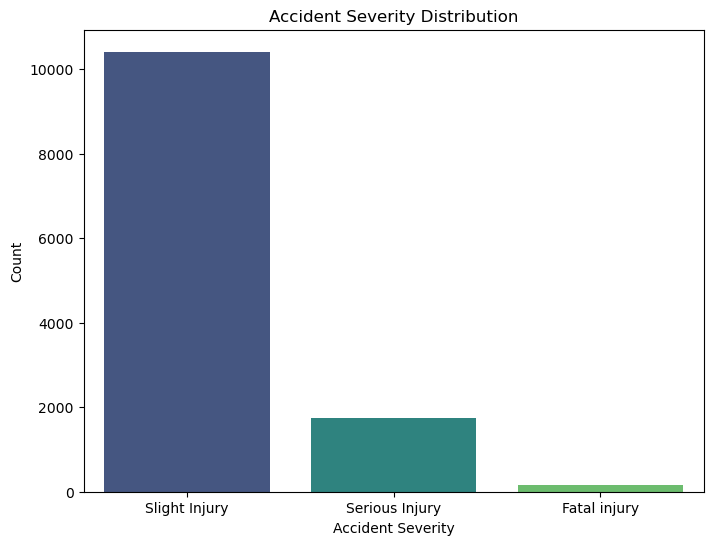

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data_cleaned, x='Accident_severity', palette='viridis')
plt.title('Accident Severity Distribution')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()

## Accident Frequency by Hour of Day


In [27]:
invalid_times = data_cleaned[data_cleaned['Time'].str.contains(r'^(2[4-9]|[3-9][0-9]):')]
print(invalid_times[['Time']])

valid_times_data = data_cleaned[~data_cleaned['Time'].str.contains(r'^(2[4-9]|[3-9][0-9]):')]

valid_times_data['DateTime'] = pd.to_datetime(default_date + ' ' + valid_times_data['Time'], format='%Y-%m-%d %H:%M')

        Time
87     40:00
88     40:00
93     45:00
94     45:00
128    59:00
...      ...
12234  35:00
12235  40:00
12239  40:00
12240  40:00
12278  54:00

[1747 rows x 1 columns]


Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'DateTime', 'Hour'],
      dtype='object')
Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Servi

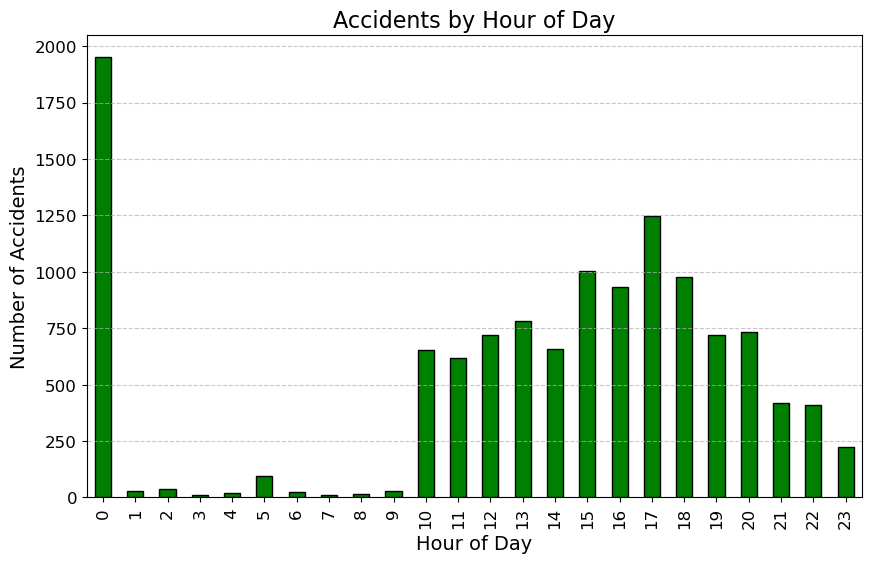

In [33]:
import re
print(data_cleaned.columns)

data_cleaned['Time'] = data_cleaned['Time'].apply(lambda x: x if not re.match(r'^(2[4-9]|[3-9][0-9]):', x) else '00:00')

default_date = '2025-01-01'
data_cleaned['DateTime'] = pd.to_datetime(default_date + ' ' + data_cleaned['Time'], format='%Y-%m-%d %H:%M')

print(data_cleaned.columns)

data_cleaned['Hour'] = data_cleaned['DateTime'].dt.hour

accident_by_hour = data_cleaned['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
accident_by_hour.plot(kind='bar', color='green', edgecolor='black')
plt.title('Accidents by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Accident Frequency by Day of the Week

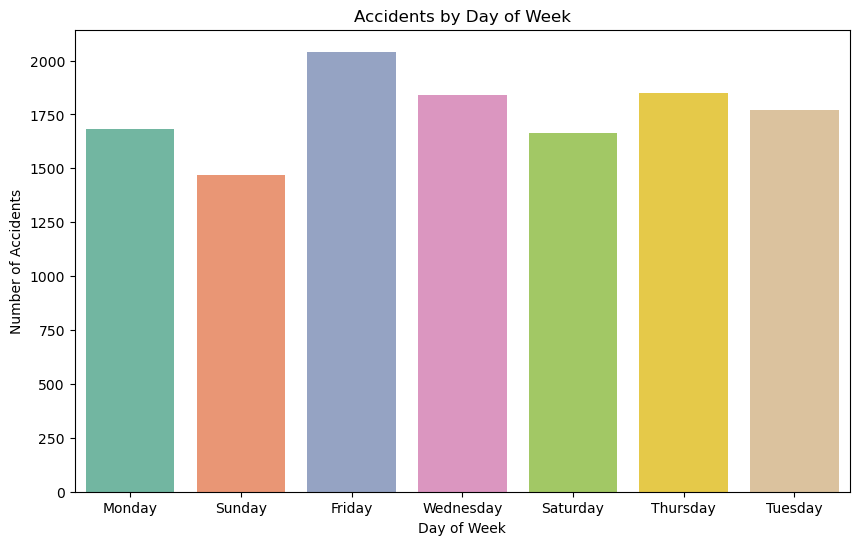

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='Day_of_week', palette='Set2')
plt.title('Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.show()

## Accidents by Weather Conditions

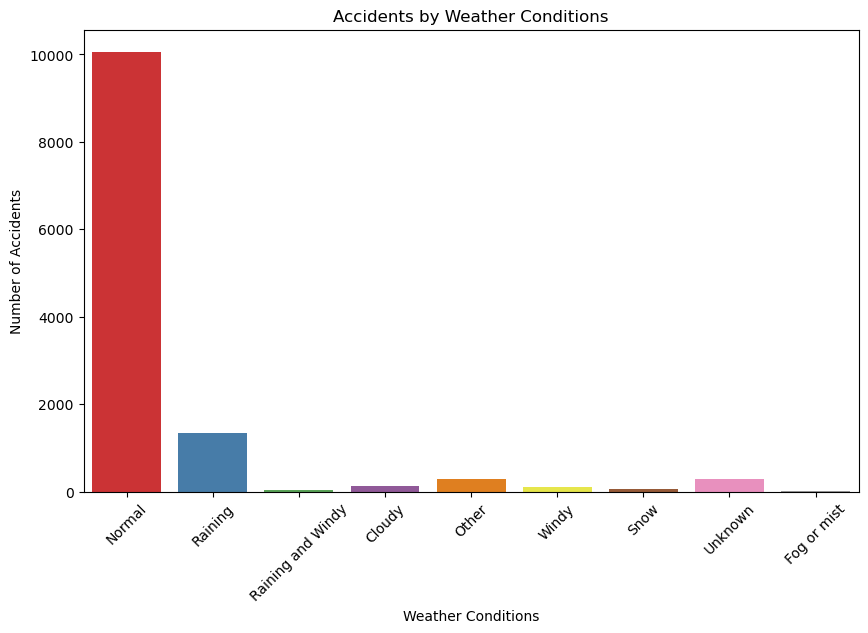

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='Weather_conditions', palette='Set1')
plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


## Accidents by Road Surface Type

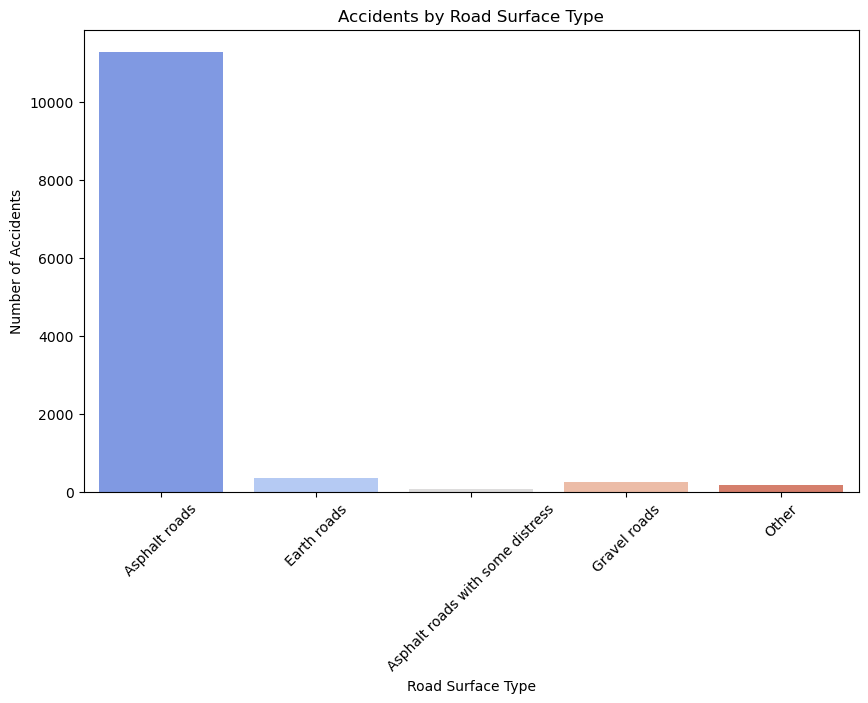

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='Road_surface_type', palette='coolwarm')
plt.title('Accidents by Road Surface Type')
plt.xlabel('Road Surface Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

In [42]:
data_cleaned.to_csv('Road_Traffic_Accidents_Cleaned.csv', index=False)